In [62]:
import datacube
import xarray as xr
import pandas as pd
%matplotlib inline
# % 

In [63]:
from datacube.storage.masking import mask_invalid_data

In [64]:
#app is a note to let GA know what we are doing with it, user-defined
#when loading data, #make sure data is on same coordinate scale or convert 
dc=datacube.Datacube(app='learn-data-access')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://rg6346@130.56.244.105:6432/datacube)>>>

In [65]:
products = dc.list_products()
products.columns.tolist()

['name',
 'description',
 'time',
 'ancillary_quality',
 'gqa_stddev_xy',
 'gqa_ref_source',
 'gqa_iterative_mean_xy',
 'gqa_cep90',
 'platform',
 'gqa_mean_xy',
 'gqa_abs_xy',
 'instrument',
 'sat_path',
 'gqa_final_gcp_count',
 'gsi',
 'lon',
 'gqa',
 'orbit',
 'sat_row',
 'gqa_abs_iterative_mean_xy',
 'product_type',
 'lat',
 'format',
 'gqa_error_message',
 'gqa_iterative_stddev_xy',
 'crs',
 'resolution',
 'tile_size',
 'spatial_dimensions']

In [66]:
display_columns = ['name', 'description', 'platform', 'product_type', 'instrument', 'crs', 'resolution']
display_columns

['name',
 'description',
 'platform',
 'product_type',
 'instrument',
 'crs',
 'resolution']

In [67]:
# #list only nbar products
Rainfall_list = products[products['product_type'] == 'rainfall'][display_columns].dropna()
# productlist = products[display_columns].dropna()
Rainfall_list

,name,description,platform,product_type,instrument,crs,resolution
id,,,,,,,
36,bom_rainfall_grids,Interpolated Rain Gauge Precipitation 1-Day Au...,BoM,rainfall,rain gauge,EPSG:4326,"[-0.05, 0.05]"


In [68]:
measurements = dc.list_measurements()
measurements.columns.tolist()

['aliases',
 'dtype',
 'flags_definition',
 'name',
 'nodata',
 'spectral_definition',
 'units']

In [69]:
display_columns = ['units', 'nodata', 'aliases']
# display meausrements for one product
measurements[display_columns].loc['bom_rainfall_grids']

,units,nodata,aliases
measurement,,,
rainfall,mm,-999,NaN


In [70]:
query = {
    'time': ('2000-01-01', '2013-12-31'),
    'lat': (-31, -31),
    'lon': (149, 149),
}
# attempt BoM rainfall 
#2 stars unpack the limits of our query, we load specific measurements from a product
Rainfall_data = dc.load(product='bom_rainfall_grids', measurements=['rainfall'], **query)

In [71]:
Rainfalldata = mask_invalid_data(Rainfall_data)
Rainfalldata

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 5113)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * latitude   (latitude) float64 -31.02
  * longitude  (longitude) float64 149.0
Data variables:
    rainfall   (time, latitude, longitude) float32 2.94406e-05 3.87305e-05 ...
Attributes:
    crs:      EPSG:4326

In [72]:
Rainfalldata.time

<xarray.DataArray 'time' (time: 5113)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', ..., '2013-12-28T00:00:00.000000000',
       '2013-12-29T00:00:00.000000000', '2013-12-30T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [73]:
#Rainfalldata.rainfall.isel(time=1).plot.imshow() # selection of time = 0 for red variable

In [74]:
#Rainfalldata.rainfall.plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')

In [75]:
Rainmonth=Rainfalldata.resample(time="1M").sum()
Rainmonth

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 168)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 ...
  * latitude   (latitude) float64 -31.02
  * longitude  (longitude) float64 149.0
Data variables:
    rainfall   (time, latitude, longitude) float32 44.2171 12.7233 86.0932 ...

In [76]:
import sys
sys.path.append('~/standard_precip/')
import standard_precip
from standard_precip.plot_index import plot_index
from standard_precip.spi import SPI 

from __future__ import absolute_import, division, print_function, unicode_literals
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np

def create_datelist(start_date, n_months):
    
    dates = [start_date + relativedelta(months=i) 
              for i in range(0, n_months)]
    
    return np.array(dates)

In [77]:
rainfall_x = Rainmonth.rainfall.data
rainfall_data = np.squeeze(rainfall_x)
rainfall_data
#rainfall_data

array([  44.21709061,   12.72330379,   86.09316254,   39.42591095,
        104.57004547,   41.96711349,   37.86081696,   38.75136566,
         11.70495701,  122.81396484,  152.92483521,   21.37288857,
         35.56732178,   57.06085968,   43.79828262,   24.22360611,
         21.1147213 ,   41.09676361,  114.64081573,   10.30725098,
         19.35280037,   55.17821884,  124.42420959,   22.86315727,
         13.01889038,   55.89009094,   16.81484222,   24.75821877,
          3.69136   ,   24.90822029,    1.82897222,    2.50342274,
         34.72764587,    7.62750721,   15.3604517 ,   50.95214081,
         24.50102043,   50.21434021,   15.57896423,  106.67299652,
          6.25969744,   40.6536026 ,   40.19612885,   82.1264801 ,
          1.48499751,   40.91105652,   34.84056854,   18.27364159,
         81.05177307,  164.13505554,   70.73784637,   17.85037041,
         20.91540146,   26.67974854,   57.05172729,   30.42542839,
         27.82072258,   30.75894356,   72.9491272 ,  136.89820

In [78]:
if __name__=='__main__':
    # Read precip data from csv
   # crnt_path = os.path.dirname(os.path.abspath('/home/599/rg6346/standard_precip/'))
    #precip_file = os.path.join(crnt_path,'standard_precip','data','rainfall_test.csv')
    #rainfall_data = np.genfromtxt(precip_file, delimiter=',')
    
    # Initialize SPI class
    spi = SPI() 
    
    # Set rolling window parameters
    spi.set_rolling_window_params(
        span=1, window_type=None, center=True
    )
    
    # Set distribution parameters
    spi.set_distribution_params(dist_type='gengamma')
    
    # Calculate SPI
    data = spi.calculate(rainfall_data, starting_month=1)
    


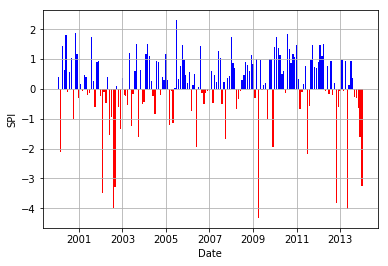

[ 0.39760298 -2.11996201  1.44172309  0.64674169  1.80450219 -0.11344056
  0.56684451  1.03255835 -1.01575521  1.86859648  1.17284851 -0.29127114
  0.17180823 -0.06541768  0.46497402  0.39845531 -0.21966154 -0.14620587
  1.7499644   0.26804681 -0.61310758  0.91542647  0.91999036 -0.23359568
 -3.47578228 -0.09428669 -0.47356238  0.40926522 -1.54957672 -0.95602775
 -3.99950115 -3.2982098   0.10777111 -0.59306119 -1.34933042  0.37028579
 -0.20218614 -0.24243906 -0.53776552  1.2080618  -1.24037304 -0.16317616
  0.617253    1.51453973 -1.6161237   0.63691847 -0.50077349 -0.43846803
  1.17835494  1.51834942  1.11543709  0.25008921 -0.22930399 -0.84027477
  0.93782601  0.88772234 -0.20335076  0.39830321  0.29840481  1.17644783
  0.30604945 -1.20558463 -0.06271499 -1.14688035  0.03891761  2.30307406
  0.34728782  0.7848622   1.47799529  0.97911917  0.46172571  0.20109691
  0.5566099  -0.72815353  0.13646171  0.51363044 -1.93712097  0.05951582
  1.4266578  -0.12795521 -0.50621342 -0.13826464 -0

In [79]:
    # Create date list for plotting
    n_dates = np.shape(data)[0]
    date_list = create_datelist(dt.date(2000,1,31), n_dates)
    
    # Plot SPI
    plot_index(date_list, data)
    print (np.squeeze(data))

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


distribution = gamma; SSE = 0.012164031567660187
distribution = gengamma; SSE = 0.012170942141385711
distribution = fisk; SSE = 0.013197750992788559
distribution = dweibull; SSE = 0.01312167061304482
distribution = logistic; SSE = 0.015595877289064596


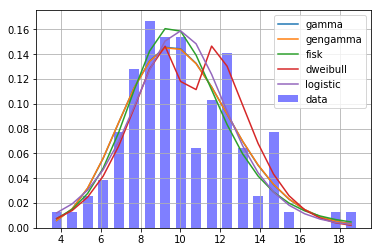

In [81]:
# Test find best distribution fit
import scipy.stats
dist_list = ['gamma', 'gengamma', 'fisk', 'dweibull', 'logistic']

test_data = scipy.stats.gamma.rvs(10., size=100)
sse = spi.best_fit_distribution(test_data, dist_list, bins=20, 
                                save_file='test.jpg')

for k in sse:
    print ("distribution = {0:}; SSE = {1:}".format(k, sse[k]))